<a href="https://colab.research.google.com/github/natttaa/ML_tasks/blob/main/game_of_thrones_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ </b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

**Автор**: Ермекова Асель

## Описание домашнего задания

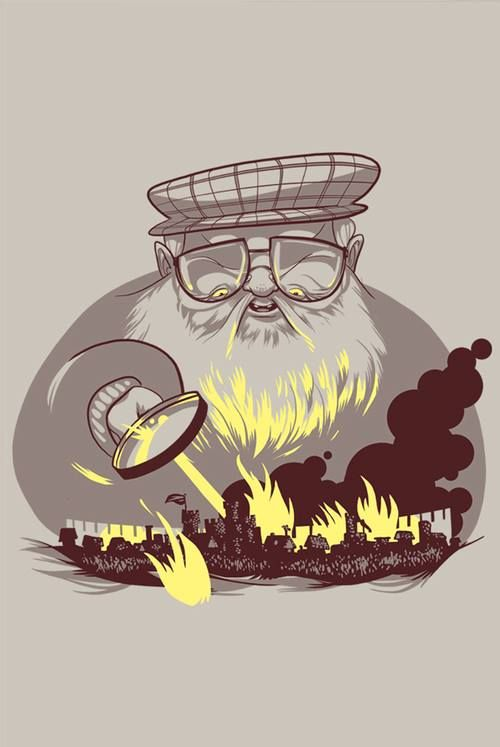

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.80$ --- 5 баллов

2) $0.80 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.50$ --- 1 балл

6) $score < 0.50$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

In [1]:
!pip install -U scikit-learn

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 74.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 5.68MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите `train` и `test` датасеты в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
df_train = pd.read_csv('/content/game_of_thrones_train.csv', index_col = 'S.No')
df_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col = 'S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

(!) Не забудьте изменить также тестовый датасет.

In [5]:
df_train.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [6]:
df_train.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


**Задание 1.4.** Создайте новые признаки.
* **1 шаг.** Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* **2 шаг.** Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* **3 шаг.** Упростите признак culture, объединив схожие названия в один.

(!) Не забудьте изменить также тестовый датасет.

1 шаг.

In [7]:
df_train['isPopular'] = (df_train['popularity'] > 0.5).astype(int)
df_test['isPopular'] = (df_test['popularity'] > 0.5).astype(int)

2 шаг.

In [8]:
df_train['boolDeadRelations'] = (df_train['numDeadRelations'] > 0).astype(int)
df_test['boolDeadRelations'] = (df_test['numDeadRelations'] > 0).astype(int)

In [9]:
df_train.drop(['popularity', 'numDeadRelations'], axis = 1, inplace = True)
df_test.drop(['popularity', 'numDeadRelations'], axis = 1, inplace = True)

In [10]:
df_train['AliveRelatives'] = ((df_train['isAliveHeir'] + df_train['isAliveFather'] + df_train['isAliveMother'] + df_train['isAliveSpouse']) > 0).astype(int)
df_test['AliveRelatives'] = ((df_test['isAliveHeir'] + df_test['isAliveFather'] + df_test['isAliveMother'] + df_test['isAliveSpouse']) > 0).astype(int)

In [11]:
df_train.drop(['isAliveHeir', 'isAliveFather', 'isAliveMother', 'isAliveSpouse'], axis = 1, inplace = True)
df_test.drop(['isAliveHeir', 'isAliveFather', 'isAliveMother', 'isAliveSpouse'], axis = 1, inplace = True)

In [12]:
df_train.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


3 шаг.

In [13]:
df_train['culture'] = df_train['culture'].fillna('Unknown')
df_test['culture'] = df_test['culture'].fillna('Unknown')

In [14]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}


In [15]:
replace_dict = {}
for main_culture, variants in cult.items():
    for variant in variants:
        replace_dict[variant] = main_culture

df_train['culture'] = df_train['culture'].replace(replace_dict)
df_test['culture'] = df_test['culture'].replace(replace_dict)

main_cultures = set(cult.keys())
df_train['culture'] = df_train['culture'].apply(lambda x: x if x in main_cultures else 'Unknown')
df_test['culture'] = df_test['culture'].apply(lambda x: x if x in main_cultures else 'Unknown')

In [16]:
df_train.isna().sum()

,0
name,0
title,840
male,0
culture,0
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

(!) Не забудьте изменить также тестовый датасет.

In [17]:
df_train.drop(['mother', 'father', 'heir', 'dateOfBirth', 'age' ], axis = 1, inplace = True)
df_test.drop(['mother', 'father', 'heir', 'dateOfBirth', 'age'], axis = 1, inplace = True)

In [18]:
df_train.drop('spouse', axis = 1, inplace = True)
df_test.drop('spouse', axis = 1, inplace = True)

In [19]:
df_train['title'] = df_train['title'].fillna('Unknown')
df_test['title'] = df_test['title'].fillna('Unknown')

In [20]:
df_train['house'] = df_train['house'].fillna('Unknown')
df_test['house'] = df_test['house'].fillna('Unknown')

In [21]:
df_test.isna().sum()

,0
name,0
title,0
male,0
culture,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

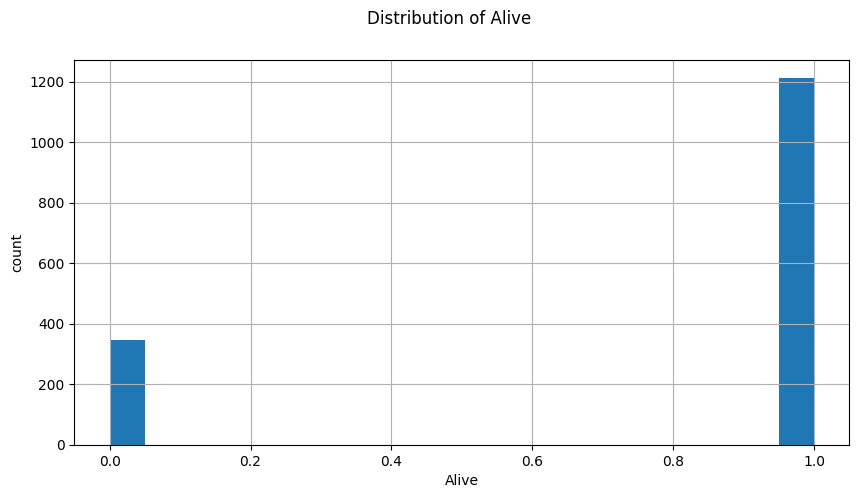

In [22]:
plt.figure(figsize = (10, 5))
df_train['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Alive')

plt.suptitle('Distribution of Alive')
plt.show()

In [23]:
df_train['culture'].value_counts()

,count
culture,
Unknown,1305
Northmen,103
Free Folk,46
Braavosi,39
Dornish,17
Ghiscari,17
Reach,13
Qartheen,5
Westermen,5


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1557 non-null   object
 1   title              1557 non-null   object
 2   male               1557 non-null   int64 
 3   culture            1557 non-null   object
 4   house              1557 non-null   object
 5   book1              1557 non-null   int64 
 6   book2              1557 non-null   int64 
 7   book3              1557 non-null   int64 
 8   book4              1557 non-null   int64 
 9   book5              1557 non-null   int64 
 10  isMarried          1557 non-null   int64 
 11  isNoble            1557 non-null   int64 
 12  isAlive            1557 non-null   int64 
 13  isPopular          1557 non-null   int64 
 14  boolDeadRelations  1557 non-null   int64 
 15  AliveRelatives     1557 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 206.8+ KB

In [25]:
unique_titles_count = df_train['house'].nunique()

print(f"Количество уникальных титулов: {unique_titles_count}")

Количество уникальных титулов: 316


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

  (!) Не забудьте изменить также тестовый датасет.

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

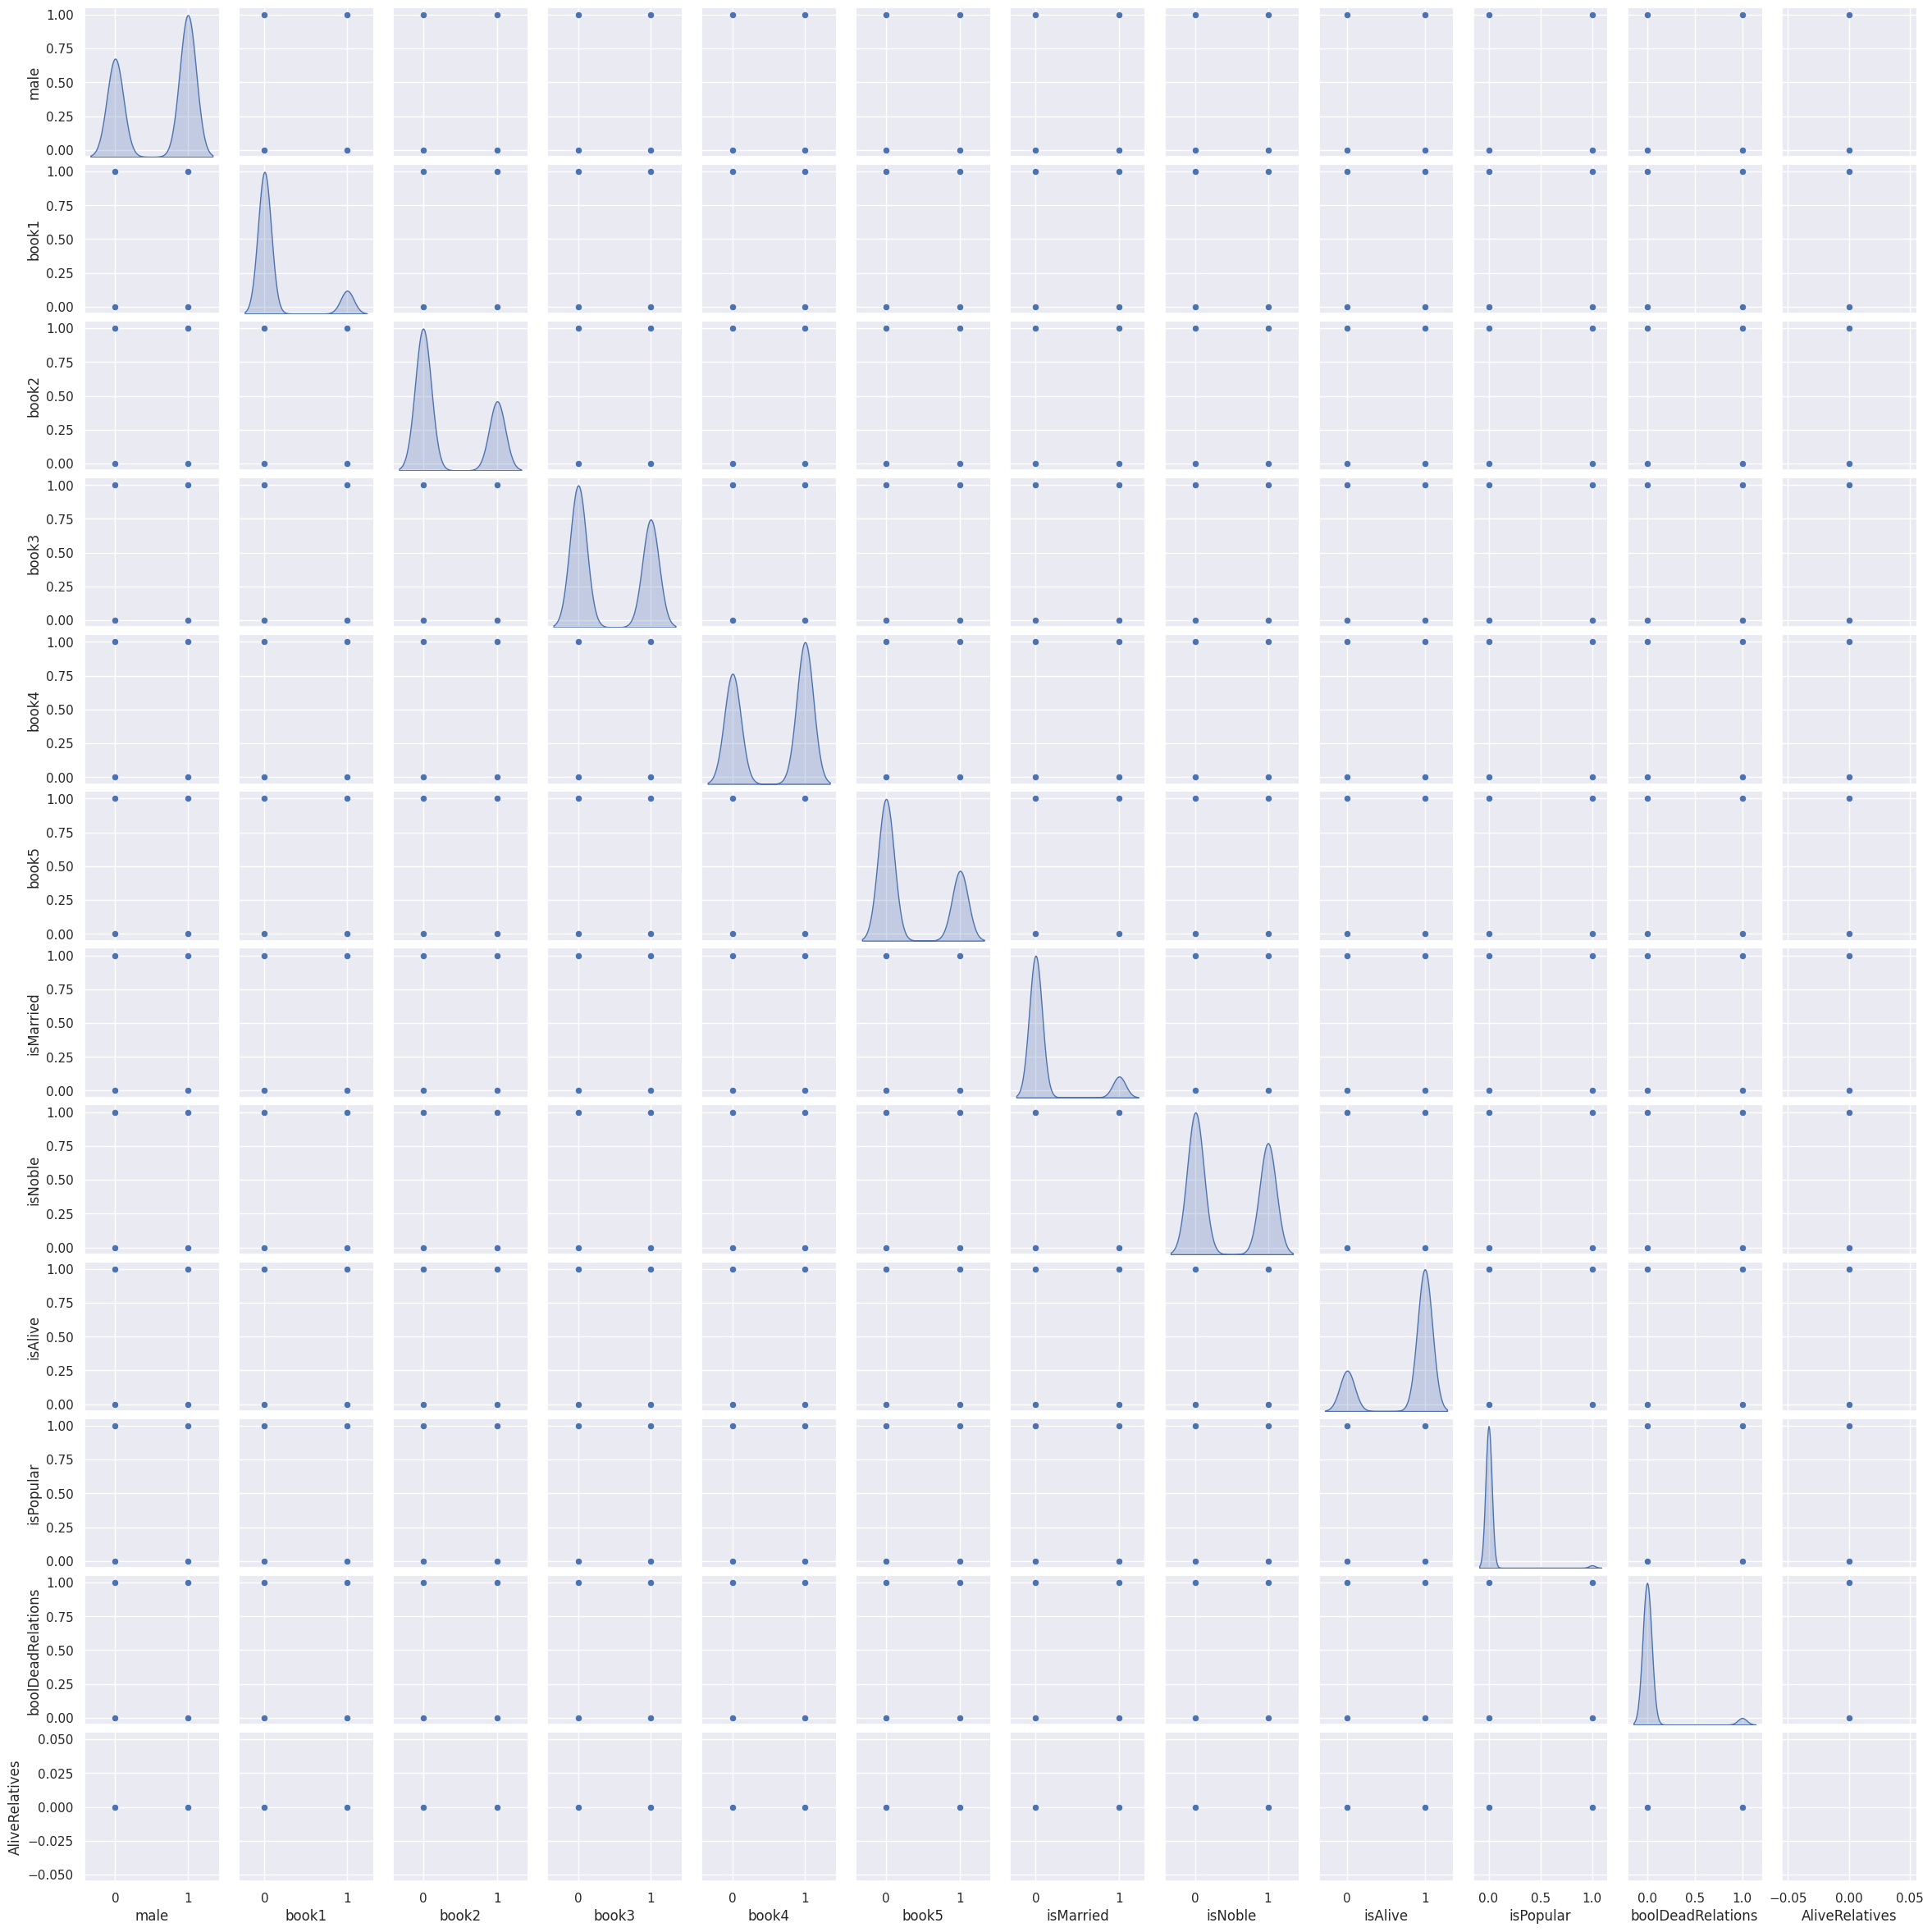

In [26]:
sns.set()
sns.pairplot(df_train, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [27]:
X = df_train.drop(['isAlive', 'title','house', 'culture', 'name'], axis = 1).values
y = df_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`.

(!) Здесь мы разделяем данные на основе файла `game_of_thrones_train.csv` на две части: train часть, на которой мы будем обучать наши модели и test часть на которой мы будем валидировать наши модели. У нас также есть тестовые данные из файла `game_of_thrones_test.csv`, для которых мы должны будем сделать предсказания при помощи лучшей модели.

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1557 non-null   object
 1   title              1557 non-null   object
 2   male               1557 non-null   int64 
 3   culture            1557 non-null   object
 4   house              1557 non-null   object
 5   book1              1557 non-null   int64 
 6   book2              1557 non-null   int64 
 7   book3              1557 non-null   int64 
 8   book4              1557 non-null   int64 
 9   book5              1557 non-null   int64 
 10  isMarried          1557 non-null   int64 
 11  isNoble            1557 non-null   int64 
 12  isAlive            1557 non-null   int64 
 13  isPopular          1557 non-null   int64 
 14  boolDeadRelations  1557 non-null   int64 
 15  AliveRelatives     1557 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 206.8+ KB

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [31]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [32]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

1) В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [42]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1) # С - параметр регуляризации

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred1 = logistic_regression.predict(X_test)

2) Обучим `RandomForestClassifier`

In [43]:
# Шаг 1. Создание модели
random_forest = RandomForestClassifier(
    n_estimators=100,      # количество деревьев в лесу
    max_depth=None,        # максимальная глубина деревьев
    random_state=42,       # для воспроизводимости результатов
    n_jobs=-1             # использование всех доступных ядер процессора
)

# Шаг 2. Обучение модели
random_forest.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred2 = random_forest.predict(X_test)

3) Обучим модель `AdaBoostClassifier`

In [38]:
# Шаг 1. Создание модели
# обычно используется как базовый классификатор decisiontree

adaboost = AdaBoostClassifier(
    estimator=None,              # базовый классификатор (по умолчанию DecisionTreeClassifier(max_depth=1))
    n_estimators=50,            # количество слабых классификаторов
    learning_rate=1.0,          # скорость обучения
    random_state=42,            # для воспроизводимости результатов
    algorithm='SAMME'         # алгоритм boosting
)

# Шаг 2. Обучение модели
adaboost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred3 = adaboost.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


4) Обучим модель `GaussianProcessClassifier`

In [82]:
# Шаг 1. Создание модели
from sklearn.gaussian_process.kernels import RBF
gpc = GaussianProcessClassifier(
    kernel=None,           # ядро (если None, используется 1.0 * RBF(1.0))
    random_state=42,       # для воспроизводимости результатов
    n_restarts_optimizer=0 # количество перезапусков оптимизатора
)

# Шаг 2. Обучение модели
gpc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred4 = gpc.predict(X_test)

5) Обучим модель `GaussianNB`

In [56]:
# Шаг 1. Создание модели
gnb = GaussianNB(
    priors=None,    # априорные вероятности классов
    var_smoothing=1e-9  # сглаживание дисперсии для численной стабильности
)

# Шаг 2. Обучение модели
gnb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred5 = gnb.predict(X_test)

6) Обучим модель `KNeighborsClassifier`

In [65]:
# Шаг 1. Создание модели
knn = KNeighborsClassifier(
    n_neighbors=5,        # количество соседей
    weights='uniform',    # веса: 'uniform' или 'distance'
    algorithm='auto',     # алгоритм: 'auto', 'ball_tree', 'kd_tree', 'brute'
    p=2,                  # метрика: 1 - манхэттенское расстояние, 2 - евклидово
    metric='minkowski'    # метрика расстояния
)

# Шаг 2. Обучение модели
knn.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred6 = knn.predict(X_test)

7) Обучение `SVC`

In [80]:
# Шаг 1. Создание модели
svc_model = SVC(
    C=1.0,                 # параметр регуляризации
    kernel='rbf',          # тип ядра ('linear', 'poly', 'rbf', 'sigmoid')
    gamma='scale',         # коэффициент для ядра ('scale', 'auto' или числовое значение)
    random_state=42,       # для воспроизводимости результатов
    probability=True       # если нужны вероятности предсказаний
)

# Шаг 2. Обучение модели
svc_model.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred7 = svc_model.predict(X_test)

8) Обучение `DecisionTreeClassifier`

In [78]:
# Шаг 1. Создание модели
dtree = DecisionTreeClassifier(
    criterion='gini',      # критерий разделения: 'gini' или 'entropy'
    max_depth=None,        # максимальная глубина дерева
    min_samples_split=2,   # минимальное количество samples для разделения узла
    min_samples_leaf=1,    # минимальное количество samples в листе
    random_state=42        # для воспроизводимости результатов
)

# Шаг 2. Обучение модели
dtree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred8 = dtree.predict(X_test)

## Часть 3. Оцените качество моделей

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [39]:
from sklearn.metrics import accuracy_score

1) В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [44]:
# Шаг 3. Предсказание на тестовых данных
y_pred1 = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
logistic_regression = accuracy_score(y_test, y_pred1)
print("Accuracy regression: %.4f" % logistic_regression)

Accuracy regression: 0.8077


2) `RandomForest`

In [45]:
# Шаг 3. Предсказание на тестовых данных
y_pred2 = random_forest.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_forest = accuracy_score(y_test, y_pred2)
print("Accuracy forest: %.4f" % accuracy_forest)

Accuracy forest: 0.8173


3) `AdaBoostClassifier`

In [41]:
# Шаг 3. Предсказание на тестовых данных
y_pred3 = adaboost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
adaboost = accuracy_score(y_test, y_pred3)
print("Accuracy adaboost: %.4f" % adaboost)

Accuracy adaboost: 0.8109


4) `GaussianProcessClassifier`

In [83]:
# Шаг 3. Предсказание на тестовых данных
y_pred4 = gpc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
gpc = accuracy_score(y_test, y_pred4)
print("Accuracy gausproc: %.4f" % gpc)

Accuracy gausproc: 0.8141


5) `GaussianNB`

In [59]:
# Шаг 3. Предсказание на тестовых данных
y_pred5 = gnb.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
gnb = accuracy_score(y_test, y_pred5)
print("Accuracy gaussiannb: %.4f" % gnb)

Accuracy gaussiannb: 0.8269


6) `KNN`

In [66]:
# Шаг 3. Предсказание на тестовых данных
y_pred6 = knn.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
knn = accuracy_score(y_test, y_pred6)
print("Accuracy knn: %.4f" % knn)

Accuracy knn: 0.7692


7) `SVC`

In [81]:
# Шаг 3. Предсказание на тестовых данных
y_pred7 = svc_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
svc_model = accuracy_score(y_test, y_pred7)
print("Accuracy svc: %.4f" % svc_model)

Accuracy svc: 0.8141


8) `DecisionTree`

In [79]:
# Шаг 3. Предсказание на тестовых данных
y_pred8 = dtree.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
dtree = accuracy_score(y_test, y_pred8)
print("Accuracy dtree: %.4f" % dtree)

Accuracy dtree: 0.7981


1.   Accuracy regression: 0.8077
2.   Accuracy forest: 0.8173
3.   Accuracy adaboost: 0.8109
4.   Accuracy gausProc: 0.8141
5.   Accuracy gaussianNB: 0.8269
6.   Accuracy knn: 0.7692
7.   Accuracy svc: 0.8141
8.   Accuracy dtree: 0.7981







Выберите лучшую модель.

In [ ]:
# выбираем за нашу модель основную gaussianNB

### Файл `submission.csv`

Вам нужно:
* **1 шаг.** сделать предсказания для `game_of_thrones_test.csv` при помощи лучшей модели
* **2 шаг.** подставить в `submission.csv` файле в колонке `isAlive` свои предсказания
* **3 шаг.** сохранить измененный файл.

In [84]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.06MB/s]


1 шаг.

In [ ]:
X_real_test = df_test.values
y_real_test_pred = models['AdaBoost'].predict(X_real_test)

2 шаг.

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

In [ ]:
submission['isAlive'] = y_real_test_pred

3 шаг. сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)